# Notebook 1 - Wavelets and Frequency Information

https://pywavelets.readthedocs.io/en/latest/ref/index.html

In [72]:
from multiprocessing import Pool, cpu_count
import os

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy.signal import cwt, ricker, convolve
from sklearn import svm, neighbors
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import pywt
import wfdb

from bc.beats import get_beats, get_beat_bank
from bc.io import ann_to_df
from bc.plot import plot_beat, plot_four_beats

base_dir = os.path.abspath('..')
data_dir = os.path.join(base_dir, 'data')

# Table of record names and the beat types they contain
beat_table = pd.read_csv(os.path.join(data_dir, 'beat-types.csv'), dtype={'record':object})
beat_table.set_index('record', inplace=True)

In [2]:
# Load Beats
n_beats, n_centers = get_beat_bank(data_dir=data_dir, beat_table=beat_table,
                                   wanted_type='N', filter=True)
l_beats, l_centers = get_beat_bank(data_dir=data_dir, beat_table=beat_table,
                                   wanted_type='L' ,filter=True)
r_beats, r_centers = get_beat_bank(data_dir=data_dir, beat_table=beat_table,
                                   wanted_type='R', filter=True)
v_beats, v_centers = get_beat_bank(data_dir=data_dir, beat_table=beat_table,
                                   wanted_type='V', filter=True)

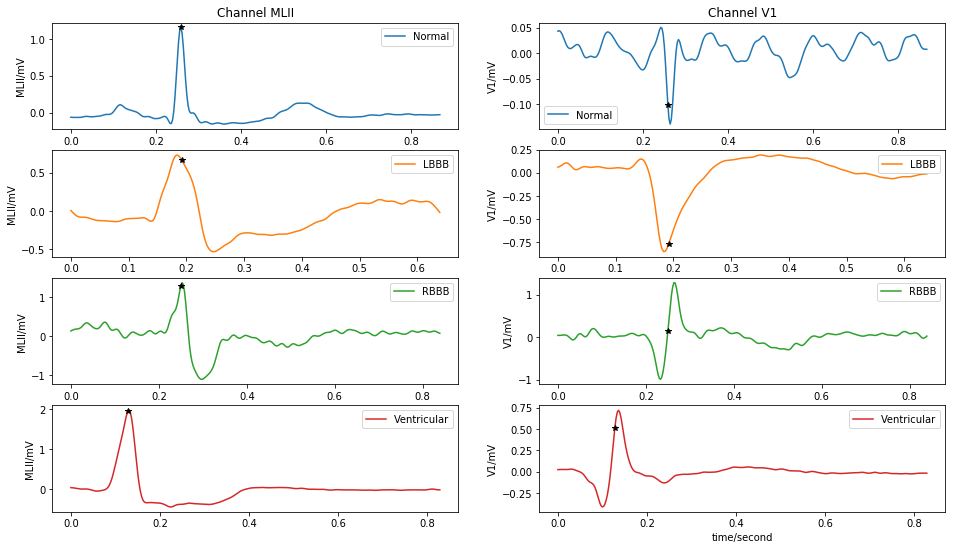

In [3]:
plot_four_beats(beats=[n_beats[0], l_beats[0], r_beats[0], v_beats[0]],
                centers=[n_centers[0], l_centers[0], r_centers[0], v_centers[0]])


# Regular qrs width is about 0.05s = 0.05 * 360 = 18 samples

In [ ]:
# 360 * .2 = 72 samples in 0.2s.
# 40hz signal = 360 / 40 = 9 samples.
# 

widths = np.arange(6, 73, 6)
cwtmatr = cwt(data=n_beats[0][:,0], wavelet=ricker, widths=widths)
plt.figure(figsize=(6.4, 4.8))
plt.imshow(cwtmatr, extent=[0, n_beats[0].shape[0], 72, 6], cmap='coolwarm', aspect='auto',
         vmax=abs(cwtmatr).max(), vmin=-abs(cwtmatr).max())
plot_beat(n_beats[0], n_centers[0], style='C0', title='Normal Beat')

cwtmatr = cwt(data=-n_beats[0][:,1], wavelet=ricker, widths=widths)
plt.figure(figsize=(6.4, 4.8))
plt.imshow(cwtmatr, extent=[0, n_beats[0].shape[0], 72, 6], cmap='coolwarm', aspect='auto',
         vmax=abs(cwtmatr).max(), vmin=-abs(cwtmatr).max())

cwtmatr = cwt(data=v_beats[0][:,0], wavelet=ricker, widths=widths)
plt.figure(figsize=(6.4, 4.8))
plt.imshow(cwtmatr, extent=[0, v_beats[0].shape[0], 72, 6], cmap='coolwarm', aspect='auto',
         vmax=abs(cwtmatr).max(), vmin=-abs(cwtmatr).max())

In [ ]:
np.arange(12, 73, 12)

In [ ]:
360 / 40

In [ ]:
import pywt

# All wavelet families
print(pywt.families())
# All wavelets
print(pywt.wavelist())
# All wavelets of a particular family
print(pywt.wavelist(family='bior'))
# Continuous wavelets
print(pywt.wavelist(kind='continuous'))

In [ ]:
import pywt
import numpy as np
import matplotlib.pyplot as plt
x = np.arange(512)
y = np.sin(2*np.pi*x/32)
coef, freqs = pywt.cwt(y,np.arange(1,30),'gaus1')
plt.imshow(coef, cmap='coolwarm') 
plt.show() 

In [ ]:
dir(wavelet)

In [ ]:
help(wavelet.wavefun)

In [ ]:
# Plot the continuous wavelet family functions, excluding complex values ones
for family in pywt.wavelist(kind='continuous'):
    wavelet = pywt.ContinuousWavelet(family)
    if not wavelet.complex_cwt:
        plt.plot(wavelet.wavefun()[0])
        plt.title(family)
        plt.show()

In [ ]:
dir(wavelet)

In [ ]:
help(wavelet.wavefun)

In [ ]:
%matplotlib qt
wavelet = pywt.ContinuousWavelet('gaus1')
for level in range(1, 9):
    plt.plot(wavelet.wavefun(level=level, length=200)[0] + level, '*-')
    plt.title(str(level))

In [ ]:
wavelet = pywt.ContinuousWavelet('gaus1')
for length in [16, 32, 64, 128]:
    plt.plot(wavelet.wavefun(length=length)[0], '*-')
    plt.title(str(length))
plt.show()

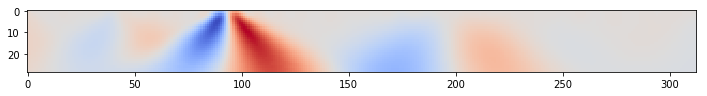

In [6]:
coef, freqs = pywt.cwt(n_beats[0][:, 0], np.arange(1,30), 'gaus1')
plt.figure(figsize=(12, 9))
plt.imshow(coef, cmap='coolwarm')
plt.show() 

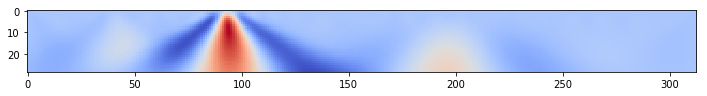

In [13]:
coef, freqs = pywt.cwt(n_beats[0][:, 0], np.arange(1,30), 'gaus2', sampling_period=1/360, )
plt.figure(figsize=(12, 9))
plt.imshow(coef, cmap='coolwarm')
plt.show()

In [9]:
coef.shape

(29, 313)

In [14]:
freqs

array([108.        ,  54.        ,  36.        ,  27.        ,
        21.6       ,  18.        ,  15.42857143,  13.5       ,
        12.        ,  10.8       ,   9.81818182,   9.        ,
         8.30769231,   7.71428571,   7.2       ,   6.75      ,
         6.35294118,   6.        ,   5.68421053,   5.4       ,
         5.14285714,   4.90909091,   4.69565217,   4.5       ,
         4.32      ,   4.15384615,   4.        ,   3.85714286,
         3.72413793])

In [16]:
% matplotlib qt

In [22]:

plt.figure()
for scalenum in range(coef.shape[0]):
    plt.plot(coef[scalenum, :])
    
plt.legend([str(s) for s in range(1, 30)])
plt.show()

In [21]:
# RBBB gaus1
coef, freqs = pywt.cwt(r_beats[0][:, 0], np.arange(1,30), 'gaus1', sampling_period=1/360, )
plt.figure(figsize=(12, 9))
plt.imshow(coef, cmap='coolwarm')
plt.show()

In [19]:
# RBBB gaus2
coef, freqs = pywt.cwt(r_beats[0][:, 0], np.arange(1,30), 'gaus2', sampling_period=1/360, )
plt.figure(figsize=(12, 9))
plt.imshow(coef, cmap='coolwarm')
plt.show()

## Section 2 - Building Features

In [59]:
# For each beat, we want a set of features to feed into a classifier
# Each beat will have two wavelet families tested on its two channels.
# We will get the maximum convolution value and the level at which it occurs.
feature_names = ['gaus1_max_II', 'gaus1_max_scale_II', 'gaus2_max_II', 'gaus2_max_scale_II',
            'gaus1_max_V', 'gaus1_max_scale_V', 'gaus2_max_V', 'gaus2_max_scale_V']



In [24]:
n_features = pd.DataFrame(columns=features)

In [47]:
def calc_wavelet_features(beat):
    """
    Calculate the 8 features for the 2 channel beat
    """
    scales = np.arange(1, 30)
    sig_name = ['MLII', 'V1']
    features = []
    
    for ch in range(2):
        # Reverse channel V1 for qrs complexes to match gaus1 wavelet deflection
        # Q: Why does this time domain reversal not affect our feature?
        if ch == 1:
            sig = -beat[:, ch]
            #sig = beat[::-1, ch]
        else:
            sig = beat[:, ch]
            
        for wavefun in ['gaus1', 'gaus2']:
            # Calculate continuous wavelet transform
            coef, freqs = pywt.cwt(sig, np.arange(1,30), wavefun, sampling_period=1/360)
            # The maximum value of the convolution array
            max_coef = coef.max()
            # The scale at which the maximum convolution value occurs
            max_scale = scales[np.where(coef==max_coef)[0][0]]
            # Save the features
            features += [max_coef, max_scale]
    return features
    

In [50]:
# Try on some beats
# Normal
features = calc_wavelet_features(n_beats[0])
features

[1.962846697594059,
 10,
 2.3854499106933824,
 10,
 0.2196237871026041,
 4,
 0.28784139181053675,
 6]

In [51]:
# Try on some beats
# LBBB
features = calc_wavelet_features(l_beats[0])
features

[3.293157560425561,
 17,
 3.17585560986421,
 21,
 2.449603872130193,
 29,
 2.7157073006397425,
 29]

In [52]:
# Try on some beats
# LBBB
features = calc_wavelet_features(l_beats[0])
features

[5.370461911219034,
 13,
 4.275797478152503,
 14,
 4.004004623954681,
 8,
 3.312797368287868,
 11]

In [53]:
# Try on some beats
# Vent
features = calc_wavelet_features(v_beats[0])
features

[5.519779207239784,
 18,
 5.774551245832584,
 19,
 2.143489402350186,
 9,
 1.6335859423240437,
 12]

In [ ]:
## Section 3 - Calculate all features and classify

In [64]:
# Get all the beats and labels together
all_beats = n_beats + l_beats + r_beats + v_beats
labels = [0]*len(n_beats) + [1]*len(l_beats) + [2]*len(r_beats) + [3]*len(v_beats)

In [65]:
# Calculate features for all records using multiple cpus
pool = Pool(processes=cpu_count() - 1)
features = pool.map(calc_wavelet_features, all_beats)

# Combine features into a data frame
features = pd.DataFrame(features, columns=feature_names)
features['type'] = labels

In [ ]:
# Question: How many rows and columns should the feature matrix have?
features.head()

In [71]:
# Split data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(features, labels,
                                                    train_size=0.75, test_size=0.25,
                                                    random_state=0)
print('Number of training records: %d' % len(x_train))
print('Number of testing records: %d' % len(x_test))

Number of training records: 64796
Number of testing records: 21599


In [73]:
# LR
clf_lr = LogisticRegression()
clf_lr.fit(x_train, y_train)
y_predict_lr = clf_lr.predict(x_test)

# KNN
clf_knn = neighbors.KNeighborsClassifier()
clf_knn.fit(x_train, y_train)
y_predict_knn = clf_knn.predict(x_test)

# SVM
clf_svm = svm.SVC()
clf_svm.fit(x_train, y_train)
y_predict_svm = clf_svm.predict(x_test)

# And GB
clf_gb = GradientBoostingClassifier()
clf_gb.fit(x_train, y_train)
y_predict_gb = clf_gb.predict(x_test)

In [74]:
from sklearn.metrics import classification_report

In [77]:
beat_types = ['Normal', 'LBBB', 'RBBB', 'Ventricular']

print('Logistic Regression')
print(classification_report(y_test, y_predict_lr, target_names=beat_types))

print('K Nearest Neigbors')
print(classification_report(y_test, y_predict_knn, target_names=beat_types))

print('Support Vector Machines')
print(classification_report(y_test, y_predict_svm, target_names=beat_types))

print('Gradient Boosting')
print(classification_report(y_test, y_predict_gb, target_names=beat_types))


Logistic Regression
             precision    recall  f1-score   support

     Normal       0.95      0.98      0.96     16438
       LBBB       0.78      0.61      0.69      1971
       RBBB       0.86      0.75      0.80      1464
Ventricular       0.69      0.68      0.69      1726

avg / total       0.91      0.91      0.91     21599

K Nearest Neigbors
             precision    recall  f1-score   support

     Normal       0.99      0.99      0.99     16438
       LBBB       0.98      0.98      0.98      1971
       RBBB       0.98      1.00      0.99      1464
Ventricular       0.96      0.93      0.95      1726

avg / total       0.99      0.99      0.99     21599

Support Vector Machines
             precision    recall  f1-score   support

     Normal       0.99      1.00      0.99     16438
       LBBB       0.99      0.98      0.99      1971
       RBBB       1.00      1.00      1.00      1464
Ventricular       0.97      0.93      0.95      1726

avg / total       0.99      